In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set_context('paper')

In [6]:
data_files = [
    '../data/results.csv',
    '../data/results_2.csv'
]

df = pd.concat(map(lambda file: pd.read_csv(file), data_files))
display(df.head(5))

progs = df['program'].unique()
print(f"Programs ({len(progs)}): {progs}")
flags = df['flag'].unique()
print(f"Flags ({len(flags)}): {flags}")

,timestamp,program,flag,return_code,execution_time,pkg_energy,dram_energy,user_time,sys_time,total_time,...,init_sys,mut_cpu,mut_sys,total_gc_cpu,total_gc_sys,minor_gc_cpu,minor_gc_sys,major_gc_cpu,major_gc_sys,balance
0,1683221035,circsim,-O2,0,245286.912,1602169.0,52734.0,0.21,0.00,0.22,...,0.0,0.118,0.118,0.101,0.101,0.093,0.093,0.008,0.008,1
1,1683221036,circsim,-O2,0,237353.362,1583614.0,52795.0,0.21,0.00,0.21,...,0.0,0.118,0.118,0.097,0.098,0.089,0.090,0.008,0.008,1
2,1683221042,circsim,-O2,0,238780.570,1529782.0,48157.0,0.19,0.02,0.21,...,0.0,0.117,0.116,0.097,0.098,0.090,0.090,0.007,0.007,1
3,1683221054,circsim,-O2,0,241376.445,1528561.0,48401.0,0.21,0.00,0.21,...,0.0,0.119,0.118,0.098,0.099,0.090,0.091,0.008,0.008,1
4,1683221066,circsim,-O2,0,244602.692,1515926.0,49377.0,0.20,0.02,0.22,...,0.0,0.120,0.120,0.100,0.100,0.092,0.092,0.008,0.008,1


Programs (14): ['circsim' 'hash' 'bernouilli' 'integrate' 'coins' 'queens' 'anna' 'fluid'
 'binary-trees' 'pidigits' 'callback001' 'chan' 'power' 'treejoin']
Flags (25): ['-O2' '-fno-case-merge' '-fno-case-folding' '-fno-call-arity'
 '-fno-exitification' '-fno-cmm-elim-common-blocks' '-fno-cmm-sink'
 '-fno-block-layout-cfg' '-fno-cpr-anal' '-fno-cse' '-fno-stg-cse'
 '-fno-dmd-tx-dict-sel' '-fno-do-eta-reduction'
 '-fno-do-lambda-eta-expansion' '-fno-float-in' '-fno-full-laziness'
 '-fno-ignore-asserts' '-fno-loopification' '-fno-specialise'
 '-fno-solve-constant-dicts' '-fno-stg-lift-lams' '-fno-strictness'
 '-fno-unbox-small-strict-fields' '-fno-spec-constr' '-fno-liberate-case']


In [9]:
df['total_energy'] = df['pkg_energy'] + df['dram_energy']

ratio_df = []
for prog in progs:
    data = df[(df['program'] == prog)]
    
    avg_total = data['total_energy'].mean()
    avg_dram = data['dram_energy'].mean()
    avg_pkg = data['pkg_energy'].mean()
    
    ratio_df.append([prog, avg_total, avg_dram, avg_pkg, avg_dram / avg_total * 100, avg_pkg / avg_total * 100])
ratio_df = pd.DataFrame(ratio_df, columns=['program', 'avg_total', 'avg_dram', 'avg_pkg', 'ratio_dram', 'ratio_pkg'])
ratio_df

,program,avg_total,avg_dram,avg_pkg,ratio_dram,ratio_pkg
0,circsim,1.635617e+06,50687.059,1.584930e+06,3.098956,96.901044
1,hash,2.464061e+06,201916.742,2.262144e+06,8.194472,91.805528
2,bernouilli,7.731864e+05,24465.869,7.487205e+05,3.164291,96.835709
3,integrate,8.325281e+05,30753.014,8.017751e+05,3.693931,96.306069
4,coins,1.508689e+07,820026.957,1.426686e+07,5.435361,94.564639
5,queens,1.140753e+07,300874.520,1.110665e+07,2.637508,97.362492
6,anna,1.150655e+06,42696.303,1.107959e+06,3.710607,96.289393
7,fluid,8.729196e+05,32330.622,8.405890e+05,3.703734,96.296266
8,binary-trees,1.595978e+06,93384.716,1.502594e+06,5.851252,94.148748
9,pidigits,1.028706e+06,32203.971,9.965024e+05,3.130531,96.869469


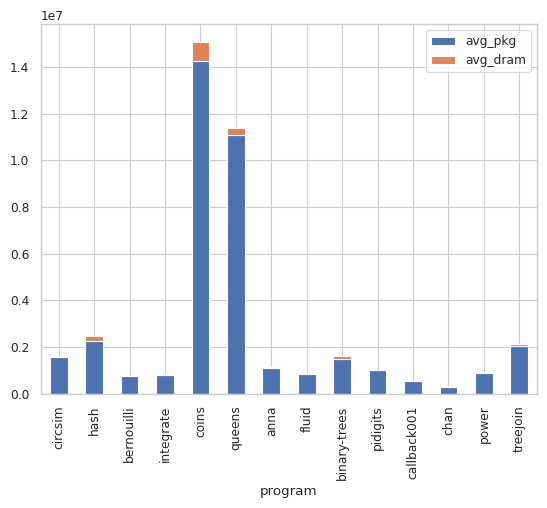

In [23]:
bar_plot = ratio_df[['program', 'avg_pkg', 'avg_dram']]
bar_plot.plot(kind='bar', stacked=True, x='program')
plt.show()

# ax = sns.barplot(ratio_df, x='program', y='avg_pkg')
# ax = sns.barplot(ax=ax, data=ratio_df, x='program', y='avg_dram')
# plt.xticks(rotation=90)
# plt.show()

In [11]:
avg_total = df['total_energy'].mean()
avg_dram = df['dram_energy'].mean()
avg_pkg = df['pkg_energy'].mean()

print(f'Avg. Total: {avg_total:.2f}')
print(f'Avg. DRAM: {avg_dram:.2f} ({avg_dram / avg_total * 100:.2f} %)')
print(f'Avg. PKG: {avg_pkg:.2f} ({avg_pkg / avg_total * 100:.2f} %)')

Avg. Total: 2912116.67
Avg. DRAM: 128221.18 (4.40 %)
Avg. PKG: 2783895.49 (95.60 %)
